# Setup

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.9MB/s 
     |████████████████████████████████| 6.5MB 11.7MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 


In [2]:
!pip install contextily

     |████████████████████████████████| 18.3MB 1.2MB/s 


# Exercise
create maps with distribution of votes by polling station (seggi elettorali) of the mayoral candidates of the municipal 2020 of Trento
Data available here:

[election data for mayor of Trento 2020](https://github.com/napo/geospatial_course_unitn/tree/master/data/election_data_trento)

---


1. know the available data
1. indentify the maps

## know the available data

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

In [4]:
urlbase = "https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/election_data_trento/"

In [5]:
votes_candidate_mayor = pd.read_csv(urlbase +  "voti_sindaco_sezioni.csv",sep=";")

In [6]:
votes_candidate_mayor

,sezione,cod_circoscrizione,circoscrizione,sezioni_pervenute,sezioni _totali,schede_bianche,schede_nulle,schede_contestate_non_attribuite,prog_sindaco,cognome_sindaco,nome_sindaco,detto _sindaco,vedova_sindaco,voti
0,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,1,MARTINI,CARMEN,NaN,N,3
1,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,2,BRUNO,FRANCO,NaN,N,0
2,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,3,IANESELLI,FRANCO,NaN,N,165
3,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,4,PANTANO,GIULIANO,NaN,N,7
4,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,5,ZANETTI,SILVIA,NaN,N,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,98,3,BONDONE,98,98,16,17,0,4,PANTANO,GIULIANO,NaN,N,11
780,98,3,BONDONE,98,98,16,17,0,5,ZANETTI,SILVIA,NaN,N,27
781,98,3,BONDONE,98,98,16,17,0,6,MERLER,ANDREA,NaN,N,237
782,98,3,BONDONE,98,98,16,17,0,7,CARLI,MARCELLO,NaN,N,49


sezione = electoral section <br/>
circoscrizione = district <br/>
voti = votes 
... 


In [7]:
geo_districts = gpd.read_file(urlbase + "circoscrizioni_trento.geojson")

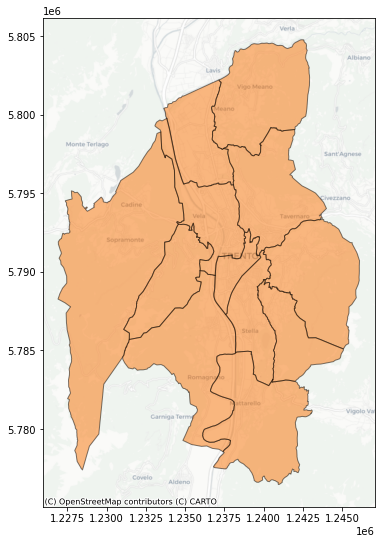

In [8]:
ax = geo_districts.to_crs(epsg=3857).plot(color='xkcd:orange',figsize=(9,9),alpha=0.5,edgecolor='black')
ctx.add_basemap(ax,crs=geo_districts.to_crs(epsg=3857).crs.to_string(),
               source=ctx.providers.CartoDB.Positron)


## list of all the candidate as mayor

In [9]:
votes_candidate_mayor.cognome_sindaco.unique()

array(['MARTINI', 'BRUNO', 'IANESELLI', 'PANTANO', 'ZANETTI', 'MERLER',
       'CARLI', 'DEGASPERI'], dtype=object)

In [10]:
votes_candidate_mayor.groupby(['cognome_sindaco']).voti.sum()

cognome_sindaco
BRUNO          144
CARLI         3102
DEGASPERI     1497
IANESELLI    31885
MARTINI       1414
MERLER       17627
PANTANO        592
ZANETTI       2075
Name: voti, dtype: int64

## ranking of the candidates

In [11]:
ranking = votes_candidate_mayor.groupby(['cognome_sindaco']).voti.sum().to_frame().reset_index()

In [12]:
ranking.sort_values(by=['voti'],ascending=False)

,cognome_sindaco,voti
3,IANESELLI,31885
5,MERLER,17627
1,CARLI,3102
7,ZANETTI,2075
2,DEGASPERI,1497
4,MARTINI,1414
6,PANTANO,592
0,BRUNO,144


## total votes for districts

In [13]:
totalvotes_districts = votes_candidate_mayor.groupby(['circoscrizione']).voti.sum()

In [14]:
totalvotes_districts.to_frame().reset_index()

,circoscrizione,voti
0,ARGENTARIO,6989
1,BONDONE,2980
2,C.STORICO/PIEDICASTELLO,9223
3,GARDOLO,6069
4,MATTARELLO,3001
5,MEANO,2649
6,OLTRE FERSINA,9637
7,POVO,3125
8,RAVINA-ROMAGNANO,2673
9,S.GIUSEPPE/S.CHIARA,8391


In [15]:
totalvotes_districts = totalvotes_districts.to_frame().reset_index()

In [16]:
totalvotes_districts.rename(columns={'voti':'totals'},inplace=True)

In [17]:
totalvotes_districts

,circoscrizione,totals
0,ARGENTARIO,6989
1,BONDONE,2980
2,C.STORICO/PIEDICASTELLO,9223
3,GARDOLO,6069
4,MATTARELLO,3001
5,MEANO,2649
6,OLTRE FERSINA,9637
7,POVO,3125
8,RAVINA-ROMAGNANO,2673
9,S.GIUSEPPE/S.CHIARA,8391


## dataframe with name of district and id code

In [18]:
districts = votes_candidate_mayor[['circoscrizione','cod_circoscrizione']].drop_duplicates()

In [19]:
districts

,circoscrizione,cod_circoscrizione
0,C.STORICO/PIEDICASTELLO,12
128,S.GIUSEPPE/S.CHIARA,11
248,OLTRE FERSINA,10
392,VILLAZZANO,9
424,MATTARELLO,8
464,POVO,7
496,ARGENTARIO,6
568,RAVINA-ROMAGNANO,5
600,SARDAGNA,4
608,BONDONE,3


### add to the total votes the id code of the districts

In [20]:
totalvotes_districts

,circoscrizione,totals
0,ARGENTARIO,6989
1,BONDONE,2980
2,C.STORICO/PIEDICASTELLO,9223
3,GARDOLO,6069
4,MATTARELLO,3001
5,MEANO,2649
6,OLTRE FERSINA,9637
7,POVO,3125
8,RAVINA-ROMAGNANO,2673
9,S.GIUSEPPE/S.CHIARA,8391


In [21]:
totalvotes_districts= pd.merge(districts,totalvotes_districts)

In [22]:
totalvotes_districts

,circoscrizione,cod_circoscrizione,totals
0,C.STORICO/PIEDICASTELLO,12,9223
1,S.GIUSEPPE/S.CHIARA,11,8391
2,OLTRE FERSINA,10,9637
3,VILLAZZANO,9,2909
4,MATTARELLO,8,3001
5,POVO,7,3125
6,ARGENTARIO,6,6989
7,RAVINA-ROMAGNANO,5,2673
8,SARDAGNA,4,690
9,BONDONE,3,2980


### votes of Ianeselli

In [23]:
candidate_ianeselli = votes_candidate_mayor[votes_candidate_mayor['cognome_sindaco']=='IANESELLI']

In [24]:
votes_by_district_ianeselli = candidate_ianeselli.groupby(['cod_circoscrizione']).sum().reset_index()[['cod_circoscrizione','voti']]

In [25]:
votes_by_district_ianeselli.cod_circoscrizione = votes_by_district_ianeselli.cod_circoscrizione.astype(int)

### merge the votes with the geometries of the districts

In [26]:
geo_districts.rename(columns={'numero_cir':'cod_circoscrizione'},inplace=True)

In [27]:
geo_districts_ianeselli = pd.merge(geo_districts,votes_by_district_ianeselli)

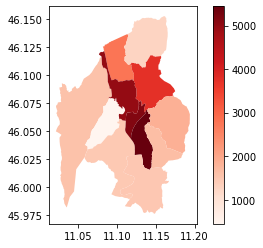

In [28]:
geo_districts_ianeselli.plot(column="voti",cmap="Reds",legend=True)
plt.show()

but ... this is absolute: we need to scale on the total of votes

In [29]:
geo_districts_ianeselli = pd.merge(geo_districts_ianeselli,totalvotes_districts)

In [30]:
geo_districts_ianeselli

,cod_circoscrizione,nome,geometry,voti,circoscrizione,totals
0,1,GARDOLO,"MULTIPOLYGON (((11.11614 46.10914, 11.11618 46...",2780,GARDOLO,6069
1,2,MEANO,"MULTIPOLYGON (((11.15678 46.11661, 11.15676 46...",1275,MEANO,2649
2,3,BONDONE,"MULTIPOLYGON (((11.08026 46.11571, 11.08039 46...",1586,BONDONE,2980
3,4,SARDAGNA,"MULTIPOLYGON (((11.09034 46.07917, 11.09041 46...",446,SARDAGNA,690
4,5,RAVINA-ROMAGNANO,"MULTIPOLYGON (((11.11591 45.98873, 11.11566 45...",1473,RAVINA-ROMAGNANO,2673
5,6,ARGENTARIO,"MULTIPOLYGON (((11.17163 46.08095, 11.17161 46...",3760,ARGENTARIO,6989
6,11,S.GIUSEPPE-S.CHIARA,"MULTIPOLYGON (((11.11135 46.05878, 11.11174 46...",5151,S.GIUSEPPE/S.CHIARA,8391
7,12,CENTRO STORICO PIEDICASTELLO,"MULTIPOLYGON (((11.12826 46.07593, 11.12815 46...",4973,C.STORICO/PIEDICASTELLO,9223
8,10,OLTREFERSINA,"MULTIPOLYGON (((11.11723 46.04331, 11.11723 46...",5441,OLTRE FERSINA,9637
9,8,MATTARELLO,"MULTIPOLYGON (((11.11591 45.98873, 11.11597 45...",1482,MATTARELLO,3001


### calculate the percentage of votes for each district

In [31]:
geo_districts_ianeselli['percentage'] = round(geo_districts_ianeselli['voti'] / geo_districts_ianeselli['totals'] * 100,1)

In [32]:
geo_districts_ianeselli

,cod_circoscrizione,nome,geometry,voti,circoscrizione,totals,percentage
0,1,GARDOLO,"MULTIPOLYGON (((11.11614 46.10914, 11.11618 46...",2780,GARDOLO,6069,45.8
1,2,MEANO,"MULTIPOLYGON (((11.15678 46.11661, 11.15676 46...",1275,MEANO,2649,48.1
2,3,BONDONE,"MULTIPOLYGON (((11.08026 46.11571, 11.08039 46...",1586,BONDONE,2980,53.2
3,4,SARDAGNA,"MULTIPOLYGON (((11.09034 46.07917, 11.09041 46...",446,SARDAGNA,690,64.6
4,5,RAVINA-ROMAGNANO,"MULTIPOLYGON (((11.11591 45.98873, 11.11566 45...",1473,RAVINA-ROMAGNANO,2673,55.1
5,6,ARGENTARIO,"MULTIPOLYGON (((11.17163 46.08095, 11.17161 46...",3760,ARGENTARIO,6989,53.8
6,11,S.GIUSEPPE-S.CHIARA,"MULTIPOLYGON (((11.11135 46.05878, 11.11174 46...",5151,S.GIUSEPPE/S.CHIARA,8391,61.4
7,12,CENTRO STORICO PIEDICASTELLO,"MULTIPOLYGON (((11.12826 46.07593, 11.12815 46...",4973,C.STORICO/PIEDICASTELLO,9223,53.9
8,10,OLTREFERSINA,"MULTIPOLYGON (((11.11723 46.04331, 11.11723 46...",5441,OLTRE FERSINA,9637,56.5
9,8,MATTARELLO,"MULTIPOLYGON (((11.11591 45.98873, 11.11597 45...",1482,MATTARELLO,3001,49.4


### plot the map

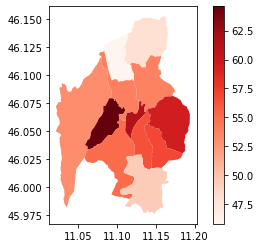

In [33]:
geo_districts_ianeselli.plot(column="percentage",cmap="Reds",legend=True)
plt.show()

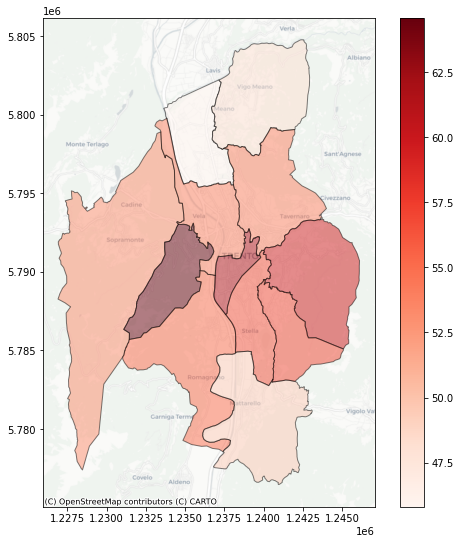

In [34]:
ax = geo_districts_ianeselli.to_crs(epsg=3857).plot(column="percentage",cmap='Reds',figsize=(9,9),alpha=0.5,edgecolor='black',legend=True)
ctx.add_basemap(ax,crs=geo_districts_ianeselli.to_crs(epsg=3857).crs.to_string(),
               source=ctx.providers.CartoDB.Positron)

### add the labels

In [35]:
geo_districts_ianeselli['label'] = geo_districts_ianeselli['circoscrizione'].str.capitalize() + " " + geo_districts_ianeselli['percentage'].astype(str)


In [36]:
representative_points = gpd.GeoDataFrame(geo_districts_ianeselli.representative_point()).reset_index()

In [37]:
labels = geo_districts_ianeselli.label.to_frame().reset_index()

In [38]:
representative_points = pd.merge(representative_points,labels)

In [39]:
representative_points.rename(columns={0:'geometry'},inplace=True)

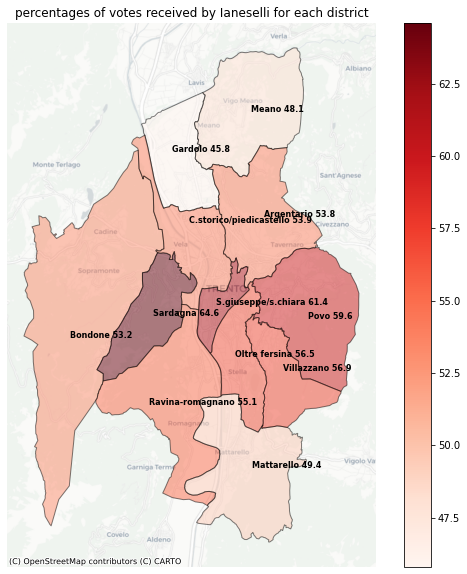

In [40]:
texts = []
f, ax = plt.subplots(1,figsize = (10, 10))
geo_districts_ianeselli.to_crs(epsg=3857).plot(ax=ax,figsize=(10,10), column="percentage",cmap='Reds',alpha=0.5,edgecolor='black',legend=True)
for x, y, label in zip(representative_points.to_crs(epsg=3857).geometry.x, representative_points.to_crs(epsg=3857).geometry.y, representative_points["label"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color="black",fontweight='bold'))
ax.set_axis_off()
ax.set_title('percentages of votes received by Ianeselli for each district')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


## compare two candidates

Martini vs Degasperi

In [41]:
def getdistrict_candidate(geo, votes,candidatefield,candidate):
  districts = votes[['circoscrizione','cod_circoscrizione']].drop_duplicates()
  totalvotes_districts = votes.groupby(['circoscrizione']).voti.sum()
  totalvotes_districts = totalvotes_districts.to_frame().reset_index()
  totalvotes_districts.rename(columns={'voti':'totals'},inplace=True)
  totalvotes_districts= pd.merge(districts,totalvotes_districts)
  candidate = votes[votes[candidatefield]==candidate]
  votes_by_district_candidate = candidate.groupby(['cod_circoscrizione']).sum().reset_index()[['cod_circoscrizione','voti']]
  votes_by_district_candidate.cod_circoscrizione = votes_by_district_candidate.cod_circoscrizione.astype(int)
  geo.rename(columns={'numero_cir':'cod_circoscrizione'},inplace=True)
  geo_districts_candidate = pd.merge(geo,votes_by_district_candidate)
  geo_districts_candidate = pd.merge(geo_districts_candidate,totalvotes_districts)
  geo_districts_candidate['percentage'] = round(geo_districts_candidate['voti'] / geo_districts_candidate['totals'] * 100,1)
  return(geo_districts_candidate)

In [42]:
data_candidates_mayor = {}
for name in votes_candidate_mayor.cognome_sindaco.unique():
  data_candidates_mayor[name] = getdistrict_candidate(geo_districts,votes_candidate_mayor,'cognome_sindaco',name)

In [43]:
data_degasperi = data_candidates_mayor['DEGASPERI']

In [44]:
data_marini = data_candidates_mayor['MARTINI']

In [45]:
map_degasperi = pd.DataFrame()
map_marini = pd.DataFrame()
for cod in data_marini.cod_circoscrizione.unique():
  p_marini = data_marini[data_marini.cod_circoscrizione==cod].percentage.values[0]
  p_degasperi = data_degasperi[data_degasperi.cod_circoscrizione==cod].percentage.values[0]
  v = None
  if (p_marini > p_degasperi):
    v = data_marini[data_marini.cod_circoscrizione==cod]
    map_marini=map_marini.append(v, ignore_index=True)
  elif (p_marini < p_degasperi):
    v = data_degasperi[data_degasperi.cod_circoscrizione==cod]
    map_degasperi=map_degasperi.append(v, ignore_index=True)

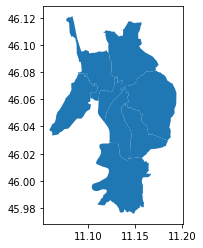

In [46]:
map_degasperi.plot()

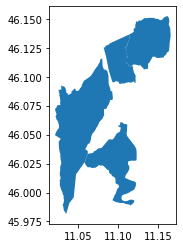

In [47]:
map_marini.plot()

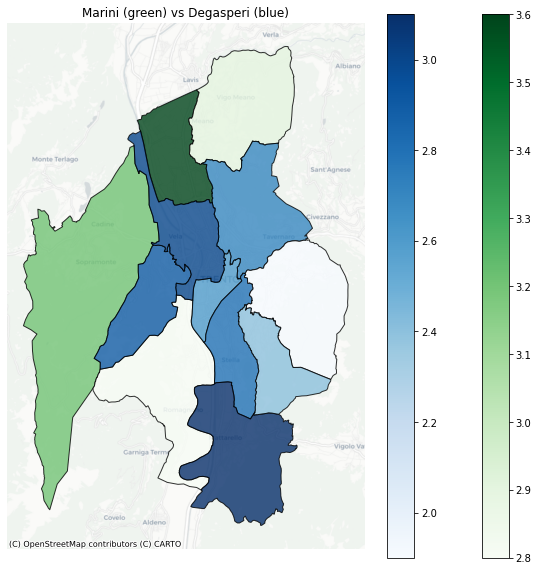

In [48]:
f, ax = plt.subplots(1,figsize = (10, 10))
map_marini.to_crs(epsg=3857).plot(ax=ax,figsize=(10,10), column="percentage",cmap='Greens',alpha=0.8,edgecolor='black',legend=True)
map_degasperi.to_crs(epsg=3857).plot(ax=ax,figsize=(10,10), column="percentage",cmap='Blues',alpha=0.8,edgecolor='black',legend=True)
ax.set_axis_off()
ax.set_title('Marini (green) vs Degasperi (blue)')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


## and the polling stations?


In [49]:
polling_stations = pd.read_csv(urlbase + "polling_places_trento.csv",sep=";")

In [50]:
votes_candidate_mayor

,sezione,cod_circoscrizione,circoscrizione,sezioni_pervenute,sezioni _totali,schede_bianche,schede_nulle,schede_contestate_non_attribuite,prog_sindaco,cognome_sindaco,nome_sindaco,detto _sindaco,vedova_sindaco,voti
0,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,1,MARTINI,CARMEN,NaN,N,3
1,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,2,BRUNO,FRANCO,NaN,N,0
2,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,3,IANESELLI,FRANCO,NaN,N,165
3,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,4,PANTANO,GIULIANO,NaN,N,7
4,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,5,ZANETTI,SILVIA,NaN,N,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,98,3,BONDONE,98,98,16,17,0,4,PANTANO,GIULIANO,NaN,N,11
780,98,3,BONDONE,98,98,16,17,0,5,ZANETTI,SILVIA,NaN,N,27
781,98,3,BONDONE,98,98,16,17,0,6,MERLER,ANDREA,NaN,N,237
782,98,3,BONDONE,98,98,16,17,0,7,CARLI,MARCELLO,NaN,N,49


### add the column with the polling station to the votes

In [51]:
votes_candidate_mayor['plesso'] = votes_candidate_mayor['sezione'].apply(lambda s: polling_stations[polling_stations['sezione']==s].plesso.unique()[0])

### total of the votes for polling station

In [52]:
total_votes_for_polling_stations = votes_candidate_mayor.groupby(['plesso']).voti.sum().to_frame().reset_index()

In [53]:
total_votes_for_polling_stations.rename(columns={'voti':'totals'},inplace=True)

In [54]:
total_votes_for_polling_stations

,plesso,totals
0,1,3228
1,2,4220
2,3,1775
3,4,4134
4,5,4257
5,6,2943
6,7,4167
7,8,2452
8,9,75
9,10,2909


### votes for a candidate (Ianeselli)

In [55]:
votes_candidate_ianeselli = votes_candidate_mayor[votes_candidate_mayor['cognome_sindaco'] == 'IANESELLI']

In [56]:
votes_candidate_ianeselli

,sezione,cod_circoscrizione,circoscrizione,sezioni_pervenute,sezioni _totali,schede_bianche,schede_nulle,schede_contestate_non_attribuite,prog_sindaco,cognome_sindaco,nome_sindaco,detto _sindaco,vedova_sindaco,voti,plesso
2,1,12,C.STORICO/PIEDICASTELLO,98,98,1,3,0,3,IANESELLI,FRANCO,NaN,N,165,1
10,2,12,C.STORICO/PIEDICASTELLO,98,98,7,8,0,3,IANESELLI,FRANCO,NaN,N,350,1
18,3,12,C.STORICO/PIEDICASTELLO,98,98,15,10,0,3,IANESELLI,FRANCO,NaN,N,322,1
26,4,12,C.STORICO/PIEDICASTELLO,98,98,8,3,0,3,IANESELLI,FRANCO,NaN,N,369,1
34,5,12,C.STORICO/PIEDICASTELLO,98,98,9,12,0,3,IANESELLI,FRANCO,NaN,N,290,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,94,12,C.STORICO/PIEDICASTELLO,98,98,10,6,0,3,IANESELLI,FRANCO,NaN,N,230,2
754,95,5,RAVINA-ROMAGNANO,98,98,8,5,0,3,IANESELLI,FRANCO,NaN,N,225,16
762,96,2,MEANO,98,98,12,16,0,3,IANESELLI,FRANCO,NaN,N,313,20
770,97,6,ARGENTARIO,98,98,17,15,0,3,IANESELLI,FRANCO,NaN,N,342,13


In [57]:
total_votes_ianeselli = votes_candidate_ianeselli.voti.sum()

In [58]:
total_votes_ianeselli

31885

### calculate the votes for polling station for the candidate

In [59]:
votes_by_polling_stations_ianeselli = votes_candidate_ianeselli.groupby(['plesso']).voti.sum().to_frame().reset_index()

In [60]:
votes_by_polling_stations_ianeselli

,plesso,voti
0,1,1845
1,2,2265
2,3,863
3,4,2585
4,5,2566
5,6,1944
6,7,2241
7,8,1208
8,9,48
9,10,1654


### add the information about sede, latitude and longitude

In [61]:
votes_by_polling_stations_ianeselli['sede'] = votes_by_polling_stations_ianeselli['plesso'].apply(lambda p: polling_stations[polling_stations.plesso==p].sede.unique()[0])

In [62]:
votes_by_polling_stations_ianeselli['longitude'] = votes_by_polling_stations_ianeselli['plesso'].apply(lambda p: polling_stations[polling_stations.plesso==p].longitude.unique()[0])

In [63]:
votes_by_polling_stations_ianeselli['latitude'] = votes_by_polling_stations_ianeselli['plesso'].apply(lambda p: polling_stations[polling_stations.plesso==p].latitude.unique()[0])

In [64]:
votes_by_polling_stations_ianeselli

,plesso,voti,sede,longitude,latitude
0,1,1845,Scuola Elementare R. Sanzio,11.12597,46.07221
1,2,2265,Scuola Elementare S. Bellesini,11.12063,46.07725
2,3,863,Centro Sociale (ex Elementari),11.12214,46.08378
3,4,2585,Scuola Elementare F. Crispi,11.12554,46.06465
4,5,2566,Scuola Elementare D. Savio,11.12081,46.05349
5,6,1944,Scuola Elementare Nicolodi,11.12948,46.05585
6,7,2241,Scuola Elementare Clarina,11.12667,46.05190
7,8,1208,Scuola Elementare Madonna Bianca,11.13395,46.03983
8,9,48,Centro Ospedaliero Santa Chiara,11.13303,46.05708
9,10,1654,Scuola Elementare G. A. Tomasi,11.14654,46.04812


### calculate the percentage for the candidate

In [65]:
votes_by_polling_stations_ianeselli = pd.merge(votes_by_polling_stations_ianeselli,total_votes_for_polling_stations)

In [66]:
votes_by_polling_stations_ianeselli['percentage'] = round(votes_by_polling_stations_ianeselli['voti'] /total_votes_ianeselli * 100,1) 

In [67]:
votes_by_polling_stations_ianeselli['total_percentage'] = round(votes_by_polling_stations_ianeselli['voti'] / votes_by_polling_stations_ianeselli['totals'] * 100,1)

In [68]:
votes_by_polling_stations_ianeselli.percentage

0     5.8
1     7.1
2     2.7
3     8.1
4     8.0
5     6.1
6     7.0
7     3.8
8     0.2
9     5.2
10    4.6
11    5.8
12    7.1
13    4.7
14    3.2
15    1.4
16    1.4
17    3.1
18    1.9
19    2.8
20    1.2
21    2.4
22    6.3
Name: percentage, dtype: float64

In [69]:
geo_votes_by_polling_stations_ianeselli = gpd.GeoDataFrame(
    votes_by_polling_stations_ianeselli,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(votes_by_polling_stations_ianeselli.longitude, votes_by_polling_stations_ianeselli.latitude))


https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

In [70]:
markersizefield = geo_votes_by_polling_stations_ianeselli.percentage

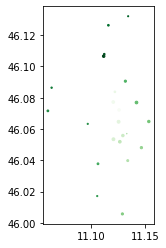

In [71]:
geo_votes_by_polling_stations_ianeselli.plot(markersize=markersizefield,cmap="Greens",marker="o")

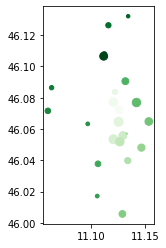

In [72]:
geo_votes_by_polling_stations_ianeselli.plot(markersize=markersizefield*10,cmap="Greens",marker="o")

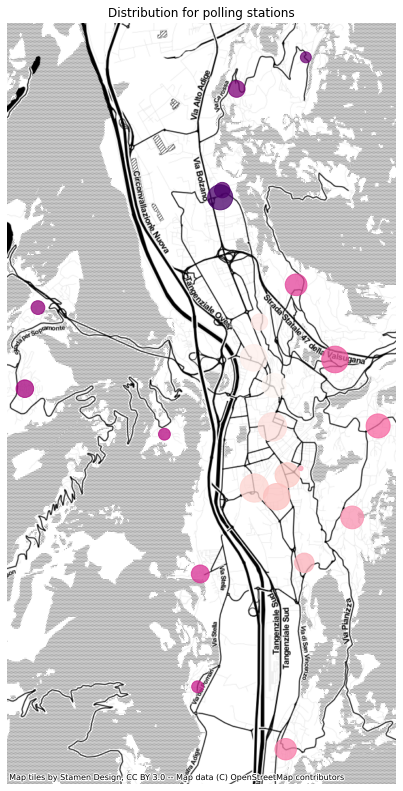

In [73]:
f, ax = plt.subplots(1,figsize = (20, 14))
geo_votes_by_polling_stations_ianeselli.to_crs(epsg=3857).plot(ax=ax, alpha=0.75, cmap='RdPu', markersize=markersizefield*100,marker="o")
ax.set_axis_off()
ax.set_title('Distribution for polling stations')
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)

In [74]:
def getvotes_by_polling_stations_candidate(stations,votes,name, fieldname):
  votes['plesso'] = votes['sezione'].apply(lambda s: stations[stations['sezione']==s].plesso.unique()[0])
  votes_by_stations = votes.groupby(['plesso']).voti.sum().to_frame().reset_index()
  votes_by_stations.rename(columns={'voti':'totals'},inplace=True)
  votes_candidate = votes[votes[fieldname] == name]
  votes_by_stations_candidate = votes_candidate.groupby(['plesso']).voti.sum().to_frame().reset_index()
  votes_by_stations_candidate['sede'] = votes_by_stations_candidate['plesso'].apply(lambda p: stations[stations.plesso==p].sede.unique()[0])
  votes_by_stations_candidate['longitude'] = votes_by_stations_candidate['plesso'].apply(lambda p: stations[stations.plesso==p].longitude.unique()[0])
  votes_by_stations_candidate['latitude'] = votes_by_stations_candidate['plesso'].apply(lambda p: stations[stations.plesso==p].latitude.unique()[0])
  votes_by_stations_candidate = pd.merge(votes_by_stations_candidate,votes_by_stations)
  votes_by_stations_candidate['percentage'] = round(votes_by_stations_candidate['voti'] / votes_by_stations_candidate.voti.sum() * 100,1)
  geo_votes_by_stations_candidate = gpd.GeoDataFrame(
    votes_by_stations_candidate,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(votes_by_stations_candidate.longitude, votes_by_stations_candidate.latitude))
  return(geo_votes_by_stations_candidate)


In [75]:
stations_zanetti = getvotes_by_polling_stations_candidate(polling_stations,votes_candidate_mayor,'ZANETTI','cognome_sindaco')

In [76]:
stations_merler = getvotes_by_polling_stations_candidate(polling_stations,votes_candidate_mayor,'ZANETTI','cognome_sindaco')

In [77]:
stations_bruno = getvotes_by_polling_stations_candidate(polling_stations,votes_candidate_mayor,'ZANETTI','cognome_sindaco')

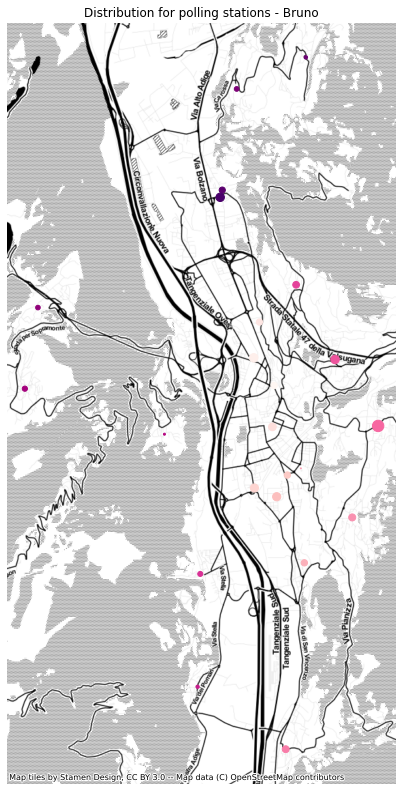

In [78]:
markersizefield = stations_bruno.percentage
f, ax = plt.subplots(1,figsize = (20, 14))
stations_bruno.to_crs(epsg=3857).plot(ax=ax, markersize=markersizefield*10,cmap="RdPu",marker="o")
ax.set_axis_off()
ax.set_title('Distribution for polling stations - Bruno')
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)